<a href="https://colab.research.google.com/github/Jayganesh-C/Airbnb-booking-analysis/blob/main/Team_Notebook_Airbnb_Bookings_Analysis_Capstone_Project_Hypothsis_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

1.Pie chart of popular neighborhood group based on number of reviews 

2.Busiest hosts plotted in number of reviews vs neighborhood group

3. Show the graph of neighborhood group and neighborhood and see the relationship 

#### **Import necessary modules required.**

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
!pip install haversine
import haversine as hs
%matplotlib inline
drive.mount('/content/drive')

In [ ]:
air_bnb_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA Capstone 1/Airbnb NYC 2019.csv')

### **Making sure the columns neighbourhood_group, room_type, price, number_of_reviews, room_type and availability_365 does not have null or NaN values**

In [ ]:
air_bnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Inference**

From table we can see that none of the columns have none values.

### **Analysing the price amoung various neighborhood group and neighborhood**

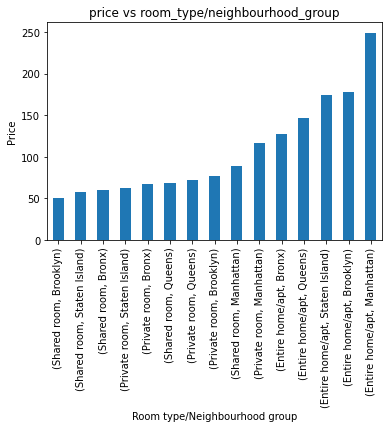

In [ ]:
# Find the mean price by grouping by room type and neighbourhood group 
room_type_df = air_bnb_df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
room_type_df.plot(kind='bar').set_title('price vs room_type/neighbourhood_group')
plt.xlabel("Room type/Neighbourhood group")
plt.ylabel("Price")
plt.show()

In [ ]:
# Find price for each room type and find the mean for the room types
price_df = air_bnb_df.groupby(['room_type'])['price'].mean().sort_values(ascending=True)
price_df.astype(int)
# Convert it into dataFrame and setting index for it
price_df = price_df.to_frame()
price_df = price_df.reset_index()
price_df.head()

,room_type,price
0,Shared room,70.127586
1,Private room,89.780973
2,Entire home/apt,211.794246


**Inference**

1.We can see from the table that (Shared room and Private room) is move affordable when compared to Entire home/apt.

2.From the graph we can see that Entire home/apt is most costly and Shared Room in Brooklyn is cheapest.

### **Analysis of reviews for various neighbourhood_groups to get a better picture**



In [ ]:
# Getting the total number of reviews and group by neighbourhood group
number_of_reviews_df = air_bnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].sum()
# Convert it into a dataframe
number_of_reviews_df = number_of_reviews_df.to_frame()
# Resetting the index 
number_of_reviews_df = number_of_reviews_df.reset_index()
# Calculating the percentage and creating a new column for it
total_reviews = number_of_reviews_df['number_of_reviews'].sum()
number_of_reviews_df['review_percentage'] = number_of_reviews_df['number_of_reviews'] / number_of_reviews_df['number_of_reviews'].sum() * 100
number_of_reviews_df.head()

,neighbourhood_group,number_of_reviews,review_percentage
0,Bronx,28371,2.493047
1,Brooklyn,486574,42.756754
2,Manhattan,454569,39.944376
3,Queens,156950,13.791679
4,Staten Island,11541,1.014143


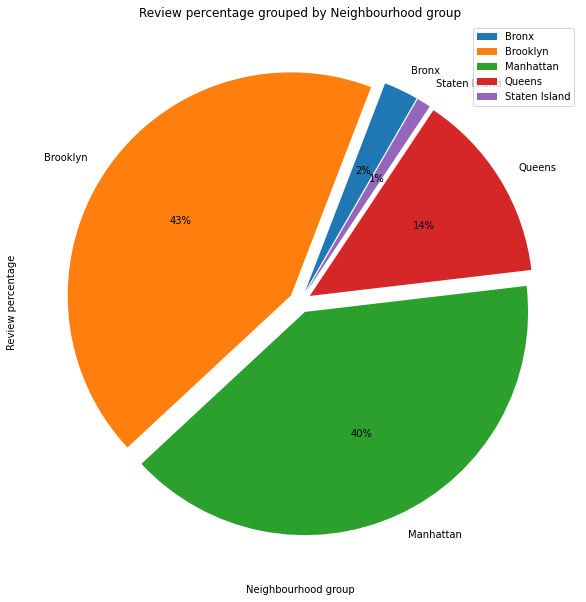

In [ ]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
number_of_reviews_df.groupby(['neighbourhood_group']).sum().plot(
    kind='pie', y='number_of_reviews', autopct='%1.0f%%', startangle=60, explode=explode,figsize = (10,20)).set_title('Review percentage grouped by Neighbourhood group')
plt.xlabel("Neighbourhood group")
plt.ylabel("Review percentage")
plt.show()

####**Inference**
 Manhattan/ Brooklyn has the hightest percentage of reviews.


### **Analysis of neighbourhood_group vs availability_365 to get a better understanding of availabitly of rooms**

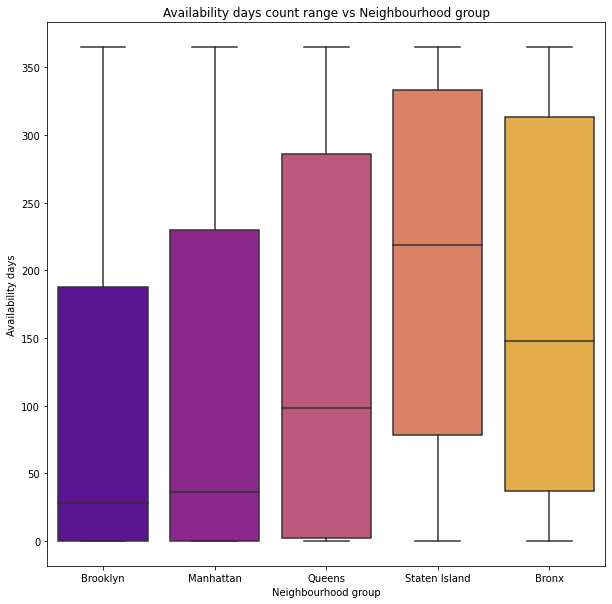

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=air_bnb_df, x='neighbourhood_group',y='availability_365',palette='plasma')
plt.xlabel("Neighbourhood group")
plt.ylabel("Availability days")
plt.title("Availability days count range vs Neighbourhood group")
plt.show()

**Inference**

From the box plot ablove we can conclude that Brooklyn is least available and Staten Island is most available throught the year.

### **Analysis of minimum_nights required to stay in the room.**

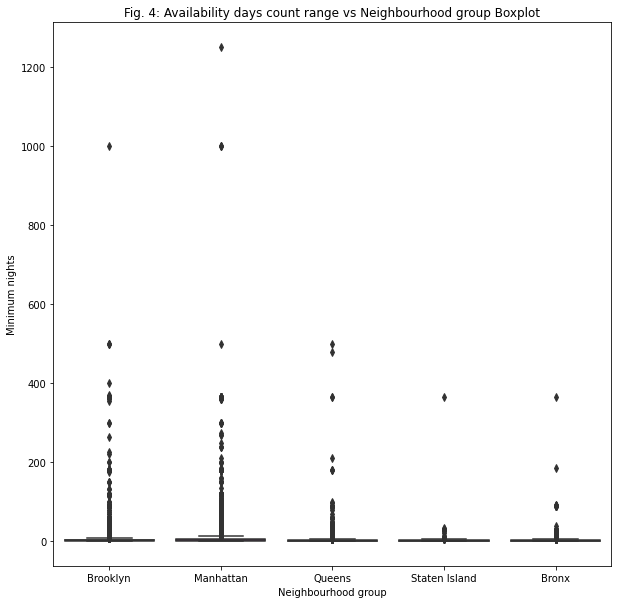

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=air_bnb_df, x='neighbourhood_group',y='minimum_nights',palette='plasma')
# Add X, Y label and title of the boxplot
plt.xlabel("Neighbourhood group")
plt.ylabel("Minimum nights")
plt.title("Fig. 4: Availability days count range vs Neighbourhood group Boxplot")
plt.show()


**Inference**

Manhattan has some rooms with highest minimum nights and brooklyn has some flexibility with respect to minimum number of nights.

Text(0.5, 1.0, 'Fig. 5: Minimum nights less than 50')

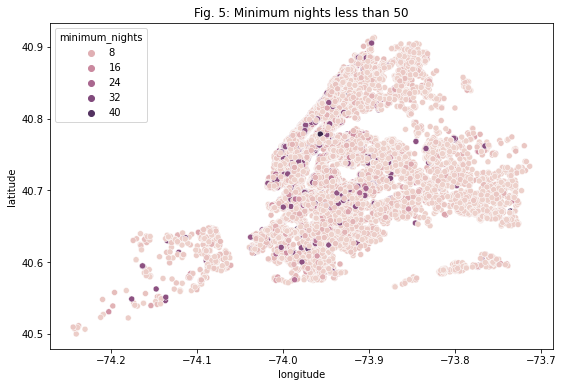

In [ ]:
# Selecting the Data Frame with minimum_nights less than 50
minimum_nights_lower_range_df = air_bnb_df[air_bnb_df['minimum_nights'] < 50]
plt.figure(figsize=(9,6))
sns.scatterplot(x=minimum_nights_lower_range_df.longitude,y=minimum_nights_lower_range_df.latitude,hue=minimum_nights_lower_range_df.minimum_nights)
plt.title("Fig. 5: Minimum nights less than 50")

**Inference**

Minimum nights less than 8 is spread across New York.

Text(0.5, 1.0, 'Fig. 6: Minimum nights greater than 50')

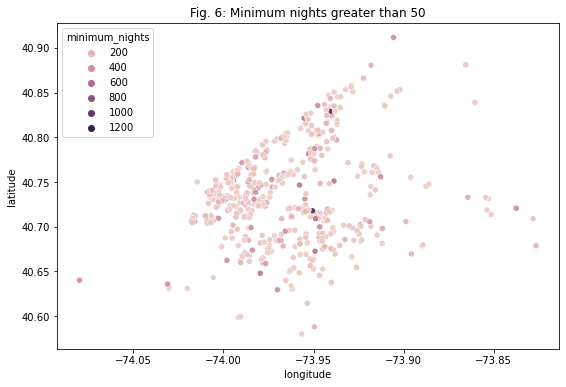

In [ ]:
# Selecting the Data Frame with minimum_nights greater than 50
minimum_nights_higher_range_df = air_bnb_df[air_bnb_df['minimum_nights'] >= 50]
plt.figure(figsize=(9,6))
sns.scatterplot(x=minimum_nights_higher_range_df.longitude,y=minimum_nights_higher_range_df.latitude,hue=minimum_nights_higher_range_df.minimum_nights)
plt.title("Fig. 6: Minimum nights greater than 50")

**Inference**

We can notice the Manhattan's values from Fig.4 in this Fig.6 as the dark spots. Rooms with minimum nights less than 50 is spread less across the city.  

In [ ]:
# Finding of Null values
df.isnull().sum()

NameError: ignored

**Inference**

  From the isnull() merthod we can know that there are some null values from the name and host_name. So let us drop the rows which is contain NaN values.

In [ ]:
# Droping the rows which is having NaN values in name and host_name
df.dropna(axis=0 , subset=['name','host_name'], inplace=True)

In [ ]:
df.isnull().sum()

Now we have rows which is having non null values in the all columns except last_review and reviews_per_month. 

In [ ]:
# Finding Correlation between each Columns
Correlation = df.corr()
plt.figure(figsize=(11,8))
plt.title("Correlation Between Columns")
sns.heatmap(Correlation, annot=True)
plt.show()

**Inference**

There is no significant corelation between any other columns except Id with host_id and number_of_reviews with reviws_per_month.

Now we going to check the duplicate 

In [ ]:
# Code to check duplicate rows
x=pd.DataFrame(index=['Duplicate rows'], columns=['number of column'])
x['number of column']=df.duplicated().sum()
x

,number of column
Duplicate rows,0


There is no duplicated rows so we move into the analysis part

#Analysis

#Top 2 guys who is having more number of rooms

Here the host_id is is the unique one. so we will take this as a subset value and We will take top 2 peaoples who is having more number of rooms for our analysis

In [ ]:
# Finding Top 2 Peoples
room_counts=df.value_counts(subset='host_id').reset_index()
room_counts.rename(columns={0:'room_count'} , inplace=True)
room_counts.head(2)

,host_id,room_count
0,219517861,327
1,107434423,232


**Inference**

The top 2 peoples are host_id **'219517861'** and **'107434423'** . The both might be doing this as a professionally. 

###**Lets analyse the host id of '219517861' which is No_1**

In [ ]:
# Filter the rows with the use of host_id.
No_1=df[df['host_id']==219517861]
No_1

**Inference**

From the above dataframe we can see that the host id **219517861**  having 327 rooms and his name is **Sonder (NYC)**.

____________________________________________________________

We will use longitude and latitude to show the locations of the each appartments with respect to neighbourhood and neighbourhood_group in scatterplot.

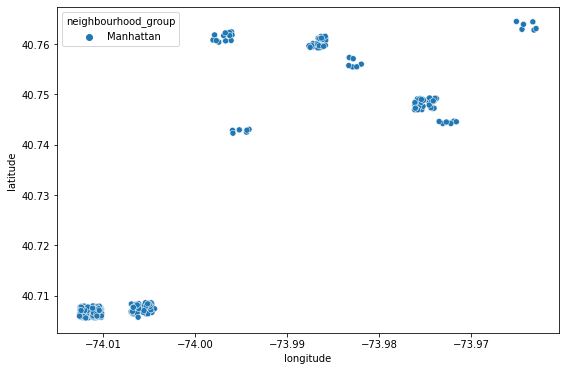

In [ ]:
# Finding Sonder (NYC) rooms with respective to the neighbourhood_group
plt.figure(figsize=(9,6))
sns.scatterplot(x=No_1.longitude,y=No_1.latitude,hue=No_1.neighbourhood_group)

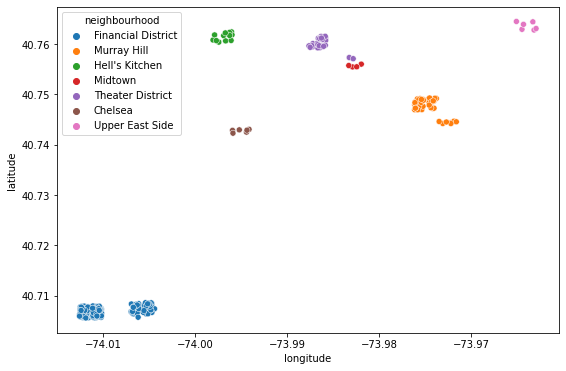

In [ ]:
# Finding Sonder (NYC) rooms with respective to the neighbourhood
plt.figure(figsize=(9,6))
sns.scatterplot(x=No_1.longitude,y=No_1.latitude,hue=No_1.neighbourhood)

**Inference**

The Sonder (NYC) having the rooms only at Manhattan neighbourhood group. In manhatten he has rooms in seven different type of neighbourhoods

###Apartment radius for the ***Sonder (NYC)***

In order to find the distance range for sonder NYC we going to add both longitude and latitude to find the minimum and maximum distance.

In [ ]:
# Finding minimum and maximum geographic coordinate from the scatter plot
No_1['new']=No_1['longitude']+ No_1['latitude']
Distance = No_1.sort_values(by='new').reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Indexing first and last geographic coordinate
latitude1=Distance['latitude'][0]
longitude1=Distance['longitude'][0]
latitude2=Distance['latitude'][326]
longitude2=Distance['longitude'][326]

In [ ]:
# Code to find the distance from the first and last location of the Sonder (NYC)
location1=(latitude1,longitude1)
location2=(latitude2,longitude2)
hs.haversine(location1,location2)/2

3.8607868957777223

**Inference**
  
  All the rooms of the Sonder (NYC) are available within the radius of 3.8kms.

____________________________________________________________________

###Lets analyse the host id of '107434423' which is No_2

In [ ]:
# Filter the rows with the use of host_id.
No_2=df[df['host_id']==107434423]
No_2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type
26137,20845031,"Homey Midtown East 1BR w/ Gym, Doorman, near t...",107434423,Blueground,Manhattan,Kips Bay,40.74510,-73.97915,Entire home/apt
29128,22370388,"Calming FiDi 1BR w/ lux Gym, Speakeasy + Doorm...",107434423,Blueground,Manhattan,Financial District,40.70637,-74.00941,Entire home/apt
30158,23264421,"Mod Midtown East 1BR w/ Gym, walk to Grand Cen...",107434423,Blueground,Manhattan,Murray Hill,40.74900,-73.97961,Entire home/apt
30428,23538486,"Posh Park Avenue 1BR w/ Gym, Doorman in Midtow...",107434423,Blueground,Manhattan,Murray Hill,40.74891,-73.97887,Entire home/apt
31506,24535218,"Luxury Tribeca 1BR w/ Gym, Doorman + Roof deck...",107434423,Blueground,Manhattan,Tribeca,40.71433,-74.01073,Entire home/apt
...,...,...,...,...,...,...,...,...,...
48723,36404684,Smart Nolita 1BR w/ W/D near famous cafes by B...,107434423,Blueground,Manhattan,Nolita,40.72283,-73.99472,Entire home/apt
48724,36404784,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76082,-73.99709,Entire home/apt
48725,36404815,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76083,-73.99727,Entire home/apt
48726,36404936,Beautiful Williamsburg 2BR w/ Skyline views + ...,107434423,Blueground,Brooklyn,Williamsburg,40.71493,-73.96365,Entire home/apt


**Inference**

From the above dataframe we can know that the host_id '**107434423**' having 232 no. of rooms and his name is Blueground 

________________________________________________________________

We will use longitude and latitude to show the locations of the each appartments with respect to neighbourhood and
neighbourhood_group in scatterplot.

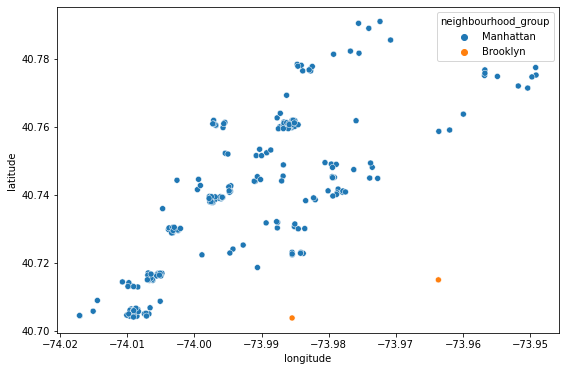

In [ ]:
# Finding Blueground rooms with respective to the neighbourhood_group
plt.figure(figsize=(9,6))
sns.scatterplot(x=No_2.longitude,y=No_2.latitude,hue=No_2.neighbourhood_group)

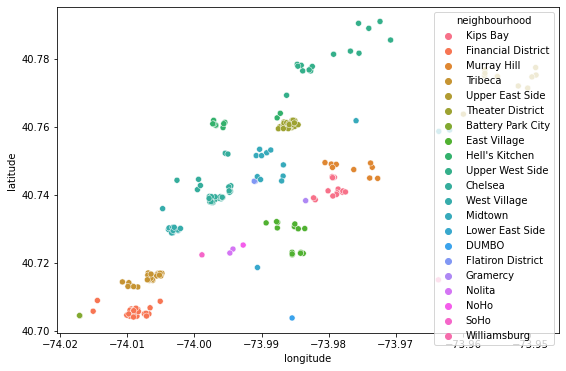

In [ ]:
# Finding Blueground rooms with respective to the neighbourhood
plt.figure(figsize=(9,6))
sns.scatterplot(x=No_2.longitude,y=No_2.latitude,hue=No_2.neighbourhood)

**Inference**

The Blueground having the rooms at two neighbourhood_group which is Manhattan and Brooklyn neighbourhood_group. In manhatten and Brooklyn he has rooms in Twenty one different neighbourhoods

###Apartment radius for the Blueground

In order to find the distance range for Blueground we going to add both longitude and latitude to find the minimum and maximum
distance.

In [ ]:
# Finding minimum and maximum geographic coordinate from the scatter plot
No_2['new']=No_2['longitude']+ No_2['latitude']
Distance = No_2.sort_values(by='new').reset_index()
Distance

In [ ]:
# Indexing first and last geographic coordinate
latitude1=Distance['latitude'][0]
longitude1=Distance['longitude'][0]
latitude2=Distance['latitude'][231]
longitude2=Distance['longitude'][231]

In [ ]:
location1=(latitude1,longitude1)
location2=(latitude2,longitude2)
hs.haversine(location1,location2)/2

4.9661643590625415

All the rooms of Blueground are available within the radius of 4.9kms.

_______________________________________________________________________________

###Which type of room is more in number?

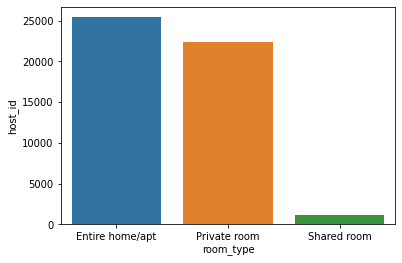

In [ ]:
# Codes to find total number of rooms with respect to each room type
room_type_count=df.groupby('room_type').host_id.count().reset_index()
sns.barplot(data=room_type_count , x='room_type' , y='host_id')')

**Inference**
      
Entire home/apt is more in number followed by private room and shared room.

### Relationship between room type and neighbourhood group.

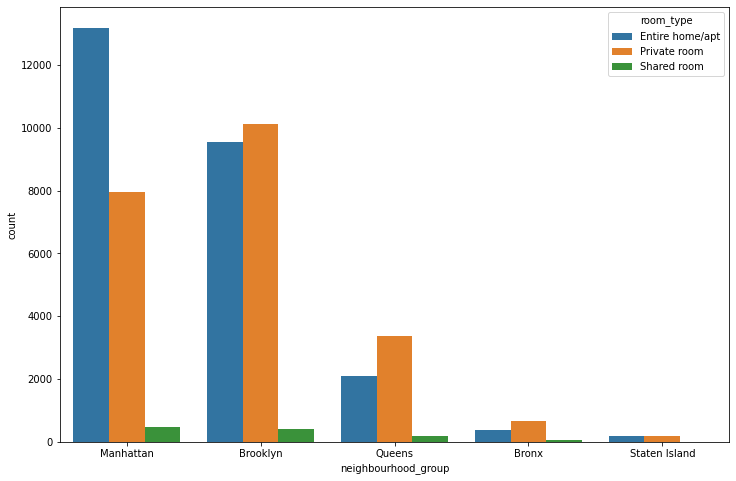

In [ ]:
# Differentiate each neighbourhood_group with respect to the room_type
neighbourhood_group_room_type=df[['neighbourhood_group','room_type']].value_counts().reset_index()
neighbourhood_group_room_type.rename(columns = {0:'count'}, inplace = True)
plt.figure(figsize=(12,8))
sns.barplot(data=neighbourhood_group_room_type, x='neighbourhood_group' , y='count', hue='room_type')

**Inference**

From the above barplot we can conclude that the maximum number of entire home/apt provided by the manhatten neighbourhood_group and the second place taken by the brooklyn next to that queens. the least number of rooms available in staten island. 

Test name


_______________________________________________________________________________________________